## Multilevel Monitoring of Activity and Sleep in Healthy People (MMASH) Data Analysis

MMASH consists of seven files for each participant (the description of each column provided in the csv file were provided below)

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import numpy
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [5]:
from function_code import open_data, circadian, HRV_analysis

In [9]:
!pip install wfdb
import wfdb

In [10]:
!pip install wget
!wget -r -N -c -np https://physionet.org/files/mmash/1.0.0/

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=c207b7f37d5f7fede395211667ecf06bfedd48c03eb83f304880945f8a0a440d
  Stored in directory: c:\users\ziang\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
url = 'https://physionet.org/files/mmash/1.0.0/'
os.system("""wget -r -N -c -np https://physionet.org/files/mmash/1.0.0/""")

1

In [3]:
path = 'MMASH/DataPaper/' # Select the path where the data are allocated
users = os.listdir(path)[:-1] # Cerate a list of users' name

In [4]:
print(users)

['user_1', 'user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16', 'user_17', 'user_18', 'user_19', 'user_2', 'user_20', 'user_21', 'user_22', 'user_3', 'user_4', 'user_5', 'user_6', 'user_7', 'user_8']


### Part 1: User Info

user_info.csv - anthropocentric characteristics of the participant:

gender: M and F refer to Male and Female, respectively.

height is expressed in centimetre (cm).

weight is expressed in kilograms (kg).

age is expressed in years.

In [6]:
df_antro = open_data.create_dataset(users,'user_info') # Import dataset with antropometric characteristics

In [7]:
df_antro

,Gender,Weight,Height,Age
user,,,,
user_1,M,65,169,29.0
user_10,M,85,180,27.0
user_11,M,115,186,27.0
user_12,M,67,170,27.0
user_13,M,74,180,25.0
user_14,M,64,171,27.0
user_15,M,80,180,24.0
user_16,M,67,176,27.0
user_17,M,60,175,24.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


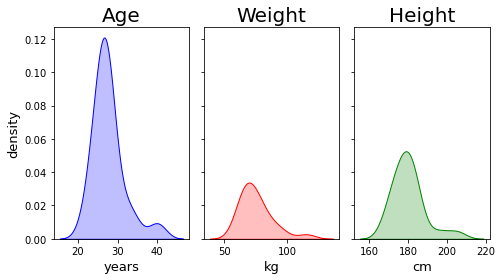

In [12]:
# Density plot of the users' antropometric characteristic distributions

f,ax = plt.subplots(1,3,figsize=(7,4),sharey=True)

for col,i,xlabel,color in zip(['Age','Weight','Height'],list(range(3)),['years','kg','cm'],['b','r','g']):
    sns.kdeplot(df_antro[col], ax=ax[i], color=color, shade=True)
    ax[i].set_title(col,fontsize=20)
    ax[i].set_xlabel(xlabel,fontsize=13)
    ax[i].legend().set_visible(False)

ax[0].set_ylabel('density',fontsize=13)

f.tight_layout()
plt.show()

### Part 2: Questionnaire

questionnaire.csv - scores for all the questionnaires:

MEQ: Morningness-Eveningness Questionnaire value. The chronotype score is ranging from 16 to 86: scores of 41 and below indicate Evening types, scores of 59 and above indicate Morning types, scores between 42-58 indicate intermediate types [1].

STAI1: State Anxiety value obtained from State-Trait Anxiety Inventory. The results are range from 20 to 80. Scores less than 31 may indicate low or no anxiety, scores between 31 and 49 an average level of anxiety or borderline levels, and scores higher than 50 a high level of anxiety or positive test results [2].

STAI2: Trait Anxiety value obtained from the State-Trait Anxiety Inventory. The results are range from 20 to 80. Scores less than 31 may indicate low or no anxiety, scores between 31 and 49 an average level of anxiety or borderline levels, and scores higher than 50 a high level of anxiety or positive test results [2].

PSQI: Pittsburgh Sleep Quality Questionnaire Index. It gives a score rating from 0 to 21, with values lower than 6 indicating good sleep quality [3].

BIS/BAS: Behavioural avoidance/inhibition index [4]. BIS/BAS scales are a typical measure of reinforcement sensitivity theory that establish biological roots in personality characteristics, derived from neuropsychological differences. The BIS/BAS scales comprise a self‐report measure of avoidance and approach tendencies that contains four sub-factors (A high score in one of the subscale describes the degree of that temperamental characteristic for the individual, according to the original sample):

Bis facet reflects subject sensitivity toward aversive events that promote avoidance behaviours.

Drive describes individual persistence and motivational intensity.

Reward corresponds to Reward Responsiveness that indicates a propensity to show a higher degree of positive emotion for goal attainment.

Fun corresponds to Fun-Seeking that is related to impulsivity and immediate reward due to sensory stimuli or risky situations.

Daily_stress: Daily Stress Inventory value (DSI) is a 58 items self-reported measures which allows a person to indicate the events they experienced in the last 24 hours. After indicating which event occurred, they indicate the stressfulness of the invent on a Likert scale from 1 (occurred but was not stressful) to 7 (Cause me to panic). It gives a score between 0 and 406. The higher is this values, the higher is the frequency and degree of the events and the perceived daily stress [5].

PANAS: Positive and Negative Affect Schedule. It gives a score rating between 5 and 50 for both positive and negative emotions [6]. The higher is the PANAS value, the higher is the perceived emotion. Columns name with 10, 14, 22 and 9+1 refer to the time of the day when the questionnaire is filled in. 9+1 indicates the 9 AM of the second recording day.

In [13]:
df_question = open_data.create_dataset(users,'questionnaire') # Import dataset with questionnaire data

In [14]:
df_question.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
MEQ,21.0,50.619048,7.053199,38.0,46.0,50.0,55.00,64.0
STAI1,21.0,35.619048,8.535082,24.0,29.0,33.0,41.00,54.0
STAI2,20.0,41.400000,5.557356,27.0,39.0,42.5,45.25,49.0
Pittsburgh,21.0,5.142857,1.851640,2.0,4.0,5.0,7.00,9.0
Daily_stress,21.0,31.904762,16.646035,10.0,22.0,30.0,41.00,74.0
BISBAS_bis,21.0,22.428571,2.461126,19.0,20.0,22.0,24.00,26.0
BISBAS_reward,21.0,19.619048,2.692140,14.0,18.0,19.0,21.00,25.0
BISBAS_drive,21.0,12.142857,2.080522,8.0,11.0,12.0,14.00,16.0
BISBAS_fun,21.0,10.857143,3.468223,5.0,8.0,11.0,14.00,16.0
panas_pos_10,21.0,27.190476,4.791858,21.0,23.0,28.0,30.00,37.0


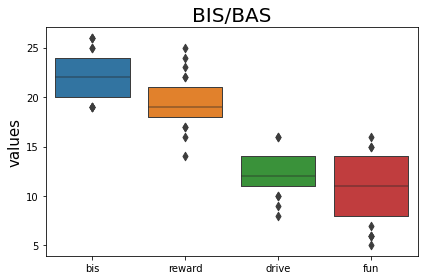

In [15]:
# Boxplot BIS/BAS for each component

df_group_BISBAS = pd.DataFrame()
for col in ['BISBAS_bis','BISBAS_reward','BISBAS_drive','BISBAS_fun']:
    df_BISBAS = pd.DataFrame(df_question[col]).rename(columns={col:'BISBAS'})
    df_BISBAS['var'] = col
    df_group_BISBAS = pd.concat([df_group_BISBAS,df_BISBAS])
    
f,ax = plt.subplots()
sns.boxenplot(df_group_BISBAS['var'],df_group_BISBAS['BISBAS'], ax=ax)
plt.xticks(list(range(4)),['bis','reward','drive','fun'])
ax.set_xlabel('')
ax.set_ylabel('values',fontsize=15)
ax.set_title('BIS/BAS',fontsize=20)
f.tight_layout()
plt.show()

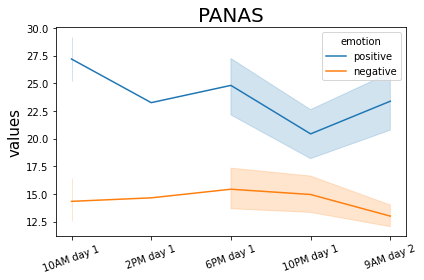

In [17]:
# Daily evolution of Positive and Negative emotions (PANAS)

df_group_Panas = pd.DataFrame()
for col in ['panas_pos_10','panas_pos_14','panas_pos_18','panas_pos_22','panas_pos_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col:'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'positive'
    df_group_Panas = pd.concat([df_group_Panas,df_PANAS])

for col in ['panas_neg_10','panas_neg_14','panas_neg_18','panas_neg_22','panas_neg_9+1']:
    df_PANAS = pd.DataFrame(df_question[col]).rename(columns={col:'PANAS'})
    df_PANAS['var'] = col
    df_PANAS['emotion'] = 'negative'
    df_group_Panas = pd.concat([df_group_Panas,df_PANAS])

df_group_Panas = df_group_Panas.replace({'panas_pos_10':'1_10AM day 1','panas_pos_14':'2_2PM day 1','panas_pos_18':'3_6PM day 1','panas_pos_22':'4_10PM day 1','panas_pos_9+1':'5_9AM day 2',
                                         'panas_neg_10':'1_10AM day 1','panas_neg_14':'2_2PM day 1','panas_neg_18':'3_6PM day 1','panas_neg_22':'4_10PM day 1','panas_neg_9+1':'5_9AM day 2'})

f,ax = plt.subplots()
sns.lineplot(x="var", y="PANAS", hue='emotion', data=df_group_Panas)
plt.xticks(list(range(5)),['10AM day 1', '2PM day 1', '6PM day 1', '10PM day 1', '9AM day 2'], rotation = 20)
ax.set_xlabel('')
ax.set_ylabel('values',fontsize=15)
ax.set_title('PANAS',fontsize=20)
f.tight_layout()
plt.show()


### Part 3: Sleep

sleep.csv - information about sleep duration and sleep quality of the participant:

In Bed Date: 1 and 2 refer to the first and second day of data recording, respectively.

In Bed Time: time of the day (hours:minutes) when the user went to the bed.

Out Bed Date: 1 and 2 refer to the first and second day of data recording, respectively.

Out Bed Time: time of the day (hours:minutes) when the user went out of the bed.

Onset Date: 1 and 2 refer to the first and second day of data recording, respectively.

Onset Time: time of the day (hours:minutes) when the user falls asleep.

Latency Efficiency: percentage of sleep time on total sleep in bed.

Total Minutes in Bed: minutes spent in the bed per night.

Total Sleep Time (TST): length of the sleep per night expressed in minutes.

Wake After Sleep Onset (WASO): time spent awake after falling asleep the first time.

Number of Awakenings during the night

Average Awakening Length: time in seconds spent awakening during the night.

Movement Index: number of minutes without movement expressed as a percentage of the movement phase (i.e., number of period with arm movement).

Fragmentation Index: number of minutes with movement expressed as a percentage of the immobile phase (i.e., the number of period without arm movement).

Sleep Fragmentation Index: ratio between the Movement and Fragmentation indices.


In [18]:
df_sleep = open_data.create_dataset(users,'sleep') # Import dataset with questionnaire data

In [19]:
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
df_sleep['In Bed Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['In Bed Time']]
df_sleep['In Bed Time'] = [x-24*60 if x>20*60 else x for x in df_sleep['In Bed Time']]

df_sleep['Out Bed Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1]) for x in df_sleep['Out Bed Time']]
df_sleep['Out Bed Time'] = [x-24*60 if x>20*60 else x  for x in df_sleep['Out Bed Time']]

df_sleep['Onset Time'] = [int(x.split(':')[0])*60+int(x.split(':')[1])for x in df_sleep['Onset Time']]
df_sleep['Onset Time'] = [x-24*60 if x>20*60 else x  for x in df_sleep['Onset Time']]

df_sleep = df_sleep.fillna(0)

In [20]:
df_sleep.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
In Bed Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
In Bed Time,21.0,50.857143,74.350041,-91.000,17.000,46.000,66.000,237.000
Out Bed Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
Out Bed Time,21.0,413.000000,72.602342,211.000,395.000,420.000,450.000,542.000
Onset Date,21.0,1.809524,0.402374,1.000,2.000,2.000,2.000,2.000
Onset Time,21.0,52.285714,74.223408,-88.000,20.000,46.000,69.000,237.000
Latency,21.0,1.428571,1.719635,0.000,0.000,0.000,3.000,4.000
Efficiency,21.0,83.533333,6.675675,73.490,76.470,84.920,88.070,94.230
Total Minutes in Bed,21.0,362.142857,79.307179,165.000,329.000,364.000,416.000,459.000
Total Sleep Time (TST),21.0,300.380952,61.522741,144.000,247.000,319.000,342.000,384.000


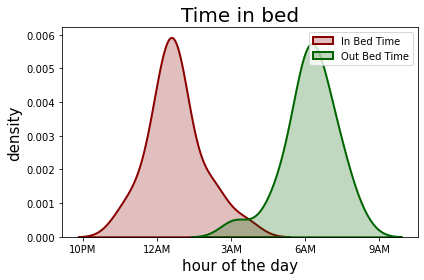

In [26]:

# Density plot of "In bed time" and "Out of bad time" distributions

f,ax = plt.subplots()
sns.kdeplot(df_sleep['In Bed Time'], label = 'In Bed Time', color='darkred', shade=True, linestyle='-', lw=2)
sns.kdeplot(df_sleep['Out Bed Time'], label = 'Out Bed Time', color='darkgreen', shade=True, linestyle='-', lw=2)
ax.set_title('Time in bed',fontsize=20)
ax.set_ylabel('density',fontsize=15)
ax.set_xlabel('hour of the day',fontsize=15)
plt.xticks(list(range(-200,800,200)),['10PM','12AM','3AM','6AM','9AM'])
f.tight_layout()
plt.legend()
plt.show()

### Part 4: Activity


Activity.csv - list of the activity categories throughout the day. The categories are (the activities listed below correspond to the numeric ID of each activity in the csv file):
1. sleeping.
2. laying down.
3. sitting, e.g. studying, eating and driving.
4. light movement, e.g. slow/medium walk, chores and work.
5. medium, e.g. fast walk and bike.
6. heavy, e.g. gym, running.
7. eating.
8. small screen usage, e.g. smartphone and computer.
9. large screen usage, e.g. TV and cinema.
10. caffeinated drink consumption, e.g. coffee or coke.
11. smoking.
12 alcohol assumption. 'Start' and 'end' columns refer to the time of the day (hours:minutes) when the event happened, while 'day' columns refers to the day when it happened (1 and 2 refer to the first and second day of data recording, respectively).


In [28]:
df_activity = open_data.create_dataset(users,'Activity',replace_na=False) # Import dataset with Activity diary data

In [29]:
# Create dict to map activity reported by users in the activity diary
dict_activity = {0: 'sleeping',
                 1: 'laying down',
                 2: 'sitting',
                 3: 'light movement',
                 4: 'medium movement',
                 5: 'heavy movement',
                 6: 'eating',
                 7: 'small screen usage',
                 8: 'large screen',
                 9: 'coffee/coke',
                 10: 'smoking',
                 11: 'alcohol assumption',
                 12: 'saliva samples'}

df_activity['Activity'] = df_activity['Activity'].replace(dict_activity) # maping activity

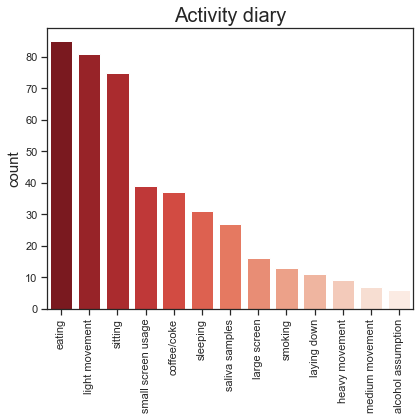

In [30]:

df_activity_count = pd.DataFrame(Counter(df_activity['Activity']).items(),columns=['Activity','count']) # Create pandas DataFrame with actifity count

# Barplot of activity counter
sns.set(style="ticks")
f,ax = plt.subplots(figsize=(6,6))
df_activity_count = df_activity_count.sort_values('count',ascending=False)
sns.barplot(df_activity_count['Activity'],df_activity_count['count'],palette='Reds_r')
plt.xlabel('')
plt.ylabel('count',fontsize=15)
plt.title('Activity diary',fontsize=20)
plt.xticks(rotation=90)
f.tight_layout()
plt.show()

### Part 5: Saliva

saliva.csv - clock genes and hormones concentrations in the saliva before going to bed and after waking up. Two samples per participant are included, one before sleep and one after waking up, as indicated by the "Sample" data column. Melatonin levels are reported in μg of melatonin per μg of protein, while cortisol levels are in μg of cortisol per 100 μg of protein. No clock genes and hormones concentrations data was provided for User_21 due to problem in the salivary samples that do not permit to analyse it.

In [40]:
df_saliva = open_data.create_dataset(users,'saliva') # Import dataset with saliva data\

NO data for user_21


In [41]:
df_saliva.groupby('SAMPLES').describe().T # Descriptive statistic of hormone concentration before sleep and at wake up time

SAMPLES               before sleep       wake up
Cortisol NORM  count  2.000000e+01  2.000000e+01
               mean   2.815678e-02  6.932549e-02
               std    3.125744e-02  5.454448e-02
               min    1.201710e-02  1.557236e-02
               25%    1.513441e-02  4.110202e-02
               50%    1.983127e-02  5.204083e-02
               75%    2.636309e-02  8.302529e-02
               max    1.557774e-01  2.612515e-01
Melatonin NORM count  2.000000e+01  1.900000e+01
               mean   8.467078e-09  7.309298e-09
               std    6.851726e-09  6.525401e-09
               min    1.629907e-09  8.283802e-10
               25%    3.182911e-09  3.088560e-09
               50%    5.912706e-09  5.730512e-09
               75%    1.190672e-08  9.146732e-09
               max    2.396239e-08  2.853905e-08

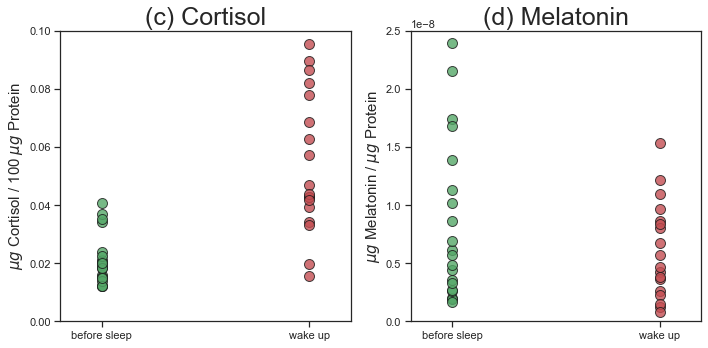

In [42]:
# Line plot of Cortisol and Melatonin concentrations obtained from saliva sample. Differencebetween “before sleep” and “wake up” hormones concentration

f,ax = plt.subplots(1,2,figsize=(10,5))
for w,c in zip(['before sleep','wake up'],['g','r']):
    df_w = df_saliva[df_saliva['SAMPLES']==w]
    df_w = df_w[df_w['Cortisol NORM']<0.1]
    ax[0].scatter([w]*len(df_w), df_w['Cortisol NORM'], c=c, label=w, edgecolors='k', s=100, alpha=0.8)
ax[0].set_title('(c) Cortisol',fontsize=25)
ax[0].set_ylabel('$\mu g$ Cortisol / 100 $\mu g$ Protein',fontsize=15)
ax[0].set_xlabel('')
plt.sca(ax[0])
plt.xlim(-0.2,1.2)
plt.ylim(0,0.10)

for w,c in zip(['before sleep','wake up'],['g','r']):
    df_w = df_saliva[df_saliva['SAMPLES']==w]
    df_w = df_w[df_w['Melatonin NORM']<2.5e-8]
    ax[1].scatter([w]*len(df_w), df_w['Melatonin NORM'], c=c, edgecolors='k', s=100, alpha=0.8)
ax[1].set_title('(d) Melatonin',fontsize=25)
ax[1].set_ylabel('$\mu g$ Melatonin / $\mu g$ Protein',fontsize=15)
ax[1].set_xlabel('')
plt.sca(ax[1])
plt.xlim(-0.2,1.2)
plt.ylim(0,2.5e-8)

f.tight_layout()
plt.show()

### Part 6: Actigraph

Actigraph.csv - accelerometer and inclinometer data recorded throughout the day:

Axis1: Raw Acceleration data of the X-axis expressed in Newton-meter.

Axis2: Raw Acceleration data of the Y-axis expressed in Newton-meter.

Axis3: Raw Acceleration data of the Z-axis expressed in Newton-meter.

Steps: number of steps per second.

HR: beats per minutes (bpm).

Inclinometer Off: values equal to 1 refer to no activation of the inclinometer. The values are reported per second.

Inclinometer Standing: values equal to 1 refer to the standing position of the user, while 0 refers to other user positions. Values are reported per second.

Inclinometer Sitting: values equal to 1 refer to the sitting position of the user, while 0 refers to other user positions. Values are reported per second.

Inclinometer Lying: values equal to 1 refer to the lying position of the user, while 0 refers to other user positions. Values are reported per second.

Vector Magnitude: vector movement derived from raw acceleration data expressed in Newton-meter.
day: 1 and 2 refer to the first and second day of data recording, respectively.

time: day time when the heartbeat happened (hours:minutes:seconds)

In [31]:
df_actigraph = open_data.create_dataset(users,'Actigraph') # Import dataset with actigraph data

In [32]:
df_actigraph.describe().T # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Axis1,459687.0,49.931142,48.572667,1.0,15.00,36.00,69.00,910.00
Axis2,412776.0,56.285380,55.387262,1.0,17.00,41.00,76.00,793.00
Axis3,481858.0,56.543967,53.863007,1.0,18.00,41.00,78.00,919.00
Steps,232694.0,1.112418,0.338917,1.0,1.00,1.00,1.00,4.00
HR,1398557.0,75.613120,17.127616,3.0,63.00,73.00,85.00,251.00
Inclinometer Off,298359.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Standing,467281.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Sitting,433908.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Inclinometer Lying,199009.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
Vector Magnitude,542835.0,89.448546,79.140751,1.0,29.15,70.83,125.28,1017.89


### Part 7: RR-Intervals

RR.csv - beat-to-beat interval data:

ibi_s: time in seconds between two consecutive beats.

day: 1 and 2 refer to the first and second day of data recording, respectively.

time: day time when the heartbeat happened (hours:minutes:seconds)

In [34]:
df_rr = open_data.create_dataset(users,'RR').reset_index() # Import dataset with RR intervals data

In [35]:
# Transform Time format in seconds. 0 refers to 12 AM, while positive and negative values refers to pre and post midnight, respectively.
df_rr['timestamp'] = [float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) if y==1 else 
                        float(x.split(':')[0])*60*60 + float(x.split(':')[1])*60 + float(x.split(':')[2]) + 24*60*60
                        for x,y in zip(df_rr['time'],df_rr['day'])]

# Fiter ectopic beats
df_rr['ibi_s'] = [x if x<2 else np.nan for x in df_rr['ibi_s']]
df_rr['ibi_s'] = [x if x>0.3 else np.nan for x in df_rr['ibi_s']]
# df_rr = df_rr.dropna()

# Compute Heart Rate values from ibi
df_rr['hr'] = [60/x for x in df_rr['ibi_s']]

In [47]:
df_rr.tail()

,user,ibi_s,day,time,timestamp,hr
1674040,user_8,NaN,-29,09:08:08,119288.0,NaN
1674041,user_8,0.325,-29,09:08:08,119288.0,184.615385
1674042,user_8,NaN,-29,09:08:08,119288.0,NaN
1674043,user_8,NaN,-29,09:08:09,119289.0,NaN
1674044,user_8,0.506,-29,09:08:09,119289.0,118.577075


In [36]:
df_rr[['ibi_s','hr']].describe().T.round(2) # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ibi_s,1665103.0,0.81,0.19,0.30,0.67,0.78,0.92,2.00
hr,1665103.0,78.86,19.73,30.02,65.43,76.43,89.29,199.34


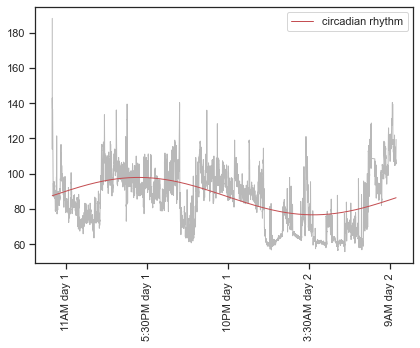

{'amp': 10.602767816507116, 'phase': 0.5003861969424266, 'APhase': 57919.0, 'offset': 87.28893547950578, 'r2': 0.20674833281423088, 'tt': array([ 36618.,  36618.,  36619., ..., 121525., 121525., 121526.]), 'ff': array([87.51931178, 87.51931178, 87.52008265, ..., 86.36930173,
       86.36930173, 86.37006988])}


In [37]:
df_user_example = df_rr[df_rr['user']=='user_1'].dropna()
res_single = circadian.fit_sin(df_user_example['timestamp'],df_user_example['hr'].rolling(60,min_periods=1).mean(),plot=True) # fit single component cosinor curves
print(res_single)

In [38]:

# Single component cosinor analysis
results = {}

for user in users:
    df_user = df_rr[df_rr['user']==user].dropna()
    results[user] = circadian.fit_sin(df_user['timestamp'],df_user['hr'],plot=False)
    
df_circadian = pd.DataFrame(results)

In [39]:
df_circadian.T[['amp','phase','offset','r2']].astype(float).describe() # Descriptive statistics

,amp,phase,offset,r2
count,21.000000,21.000000,21.000000,21.000000
mean,11.420169,0.392904,76.960570,0.232420
std,5.322403,0.762214,6.992811,0.159349
min,1.039398,-1.654571,65.975072,0.001986
25%,7.905381,0.215904,72.567970,0.095833
50%,11.870312,0.564229,75.972583,0.193091
75%,14.307344,0.869257,78.354160,0.304527
max,21.847015,1.340508,92.898146,0.526205


### Part 7a: FDA representation

In [46]:
import skfda

In [ ]:
!pip install traces
import traces  # for 

In [49]:
# Some further cleaning for input data
df_rr.describe().T.round(2) # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ibi_s,1665103.0,0.81,0.19,0.30,0.67,0.78,0.92,2.00
day,1674045.0,0.90,3.59,-29.00,1.00,1.00,2.00,2.00
timestamp,1674045.0,74686.67,24910.46,32724.00,53521.00,72654.00,94961.00,125999.00
hr,1665103.0,78.86,19.73,30.02,65.43,76.43,89.29,199.34


In [50]:
df_rr[df_rr["day"] == -29]

,user,ibi_s,day,time,timestamp,hr
1650611,user_8,0.900,-29,00:00:00,86400.0,66.666667
1650612,user_8,0.873,-29,00:00:01,86401.0,68.728522
1650613,user_8,0.851,-29,00:00:02,86402.0,70.505288
1650614,user_8,0.856,-29,00:00:02,86402.0,70.093458
1650615,user_8,0.890,-29,00:00:03,86403.0,67.415730
...,...,...,...,...,...,...
1674040,user_8,NaN,-29,09:08:08,119288.0,NaN
1674041,user_8,0.325,-29,09:08:08,119288.0,184.615385
1674042,user_8,NaN,-29,09:08:08,119288.0,NaN
1674043,user_8,NaN,-29,09:08:09,119289.0,NaN


In [52]:
# Prepare RR for FDA
df_rr["day"] = df_rr['day'].replace(-29,2)

In [171]:
#df_rr["user"] = df_rr['user'].str.replace(r'user_','')
df_rr["user"] = df_rr['user'].astype(str)
df_rr['user'] = df_rr['user'].apply(lambda x: x.zfill(2))

In [172]:
df_rr.dtypes

user                 object
ibi_s               float64
day                   int64
time                 object
timestamp           float64
hr                  float64
date                 object
datetime     datetime64[ns]
dtype: object

In [173]:
# Make datatime index for later resampling
df_rr['date'] = ["2000-01-01 " if x == 1 else "2000-01-02 "
                        for x in df_rr['day']]
df_rr['datetime'] = pd.to_datetime(df_rr['date'] + df_rr['time'])
df_rr.head()

,user,ibi_s,day,time,timestamp,hr,date,datetime
0,01,NaN,1,10:10:17,36617.0,NaN,2000-01-01,2000-01-01 10:10:17
1,01,0.319,1,10:10:18,36618.0,188.087774,2000-01-01,2000-01-01 10:10:18
2,01,NaN,1,10:10:18,36618.0,NaN,2000-01-01,2000-01-01 10:10:18
3,01,0.401,1,10:10:18,36618.0,149.625935,2000-01-01,2000-01-01 10:10:18
4,01,1.089,1,10:10:19,36619.0,55.096419,2000-01-01,2000-01-01 10:10:19


In [174]:
# Some further cleaning for input data
df_rr.describe().T.round(2) # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
ibi_s,1665103.0,0.81,0.19,0.30,0.67,0.78,0.92,2.00
day,1674045.0,1.34,0.47,1.00,1.00,1.00,2.00,2.00
timestamp,1674045.0,74686.67,24910.46,32724.00,53521.00,72654.00,94961.00,125999.00
hr,1665103.0,78.86,19.73,30.02,65.43,76.43,89.29,199.34


In [175]:
df_res = df_rr.set_index(["datetime"])
df_res = df_res.drop(columns=["day", "timestamp", "ibi_s", "date", "time"])
df_res.head()

,user,hr
datetime,,
2000-01-01 10:10:17,01,NaN
2000-01-01 10:10:18,01,188.087774
2000-01-01 10:10:18,01,NaN
2000-01-01 10:10:18,01,149.625935
2000-01-01 10:10:19,01,55.096419


NameError: name 'df_res' is not defined

In [177]:
df_intp['hr'] = df_intp['hr'].interpolate()
df_intp

hr
user datetime                       
01   2000-01-01 10:10:17         NaN
     2000-01-01 10:10:18  168.856855
     2000-01-01 10:10:19   55.096419
     2000-01-01 10:10:20  128.914389
     2000-01-01 10:10:21   64.308682
...                              ...
22   2000-01-02 08:38:45  167.414219
     2000-01-02 08:38:46  177.692072
     2000-01-02 08:38:47  187.969925
     2000-01-02 08:38:48  147.509678
     2000-01-02 08:38:49  107.049432

[1821760 rows x 1 columns]

<AxesSubplot:xlabel='datetime'>

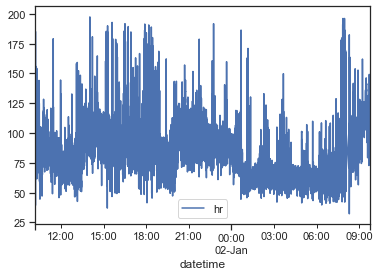

In [194]:
# do a plot for the timeseries
df_intp.reset_index('user')
df_intp1 = df_intp.loc['01']
df_intp1.plot(legend='True')

user
01    AxesSubplot(0.125,0.125;0.775x0.755)
02    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

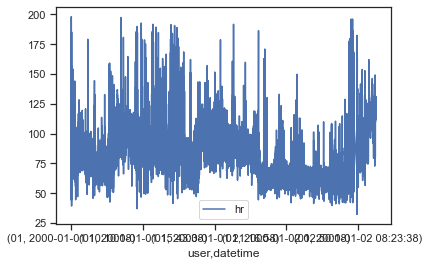

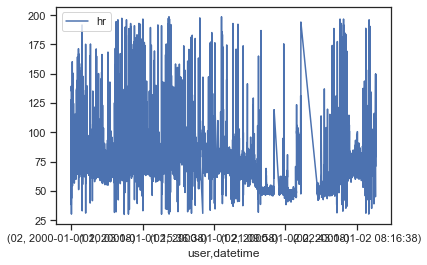

In [201]:
df_intp2 = df_intp.loc[['01', '02']]
df_intp2.groupby("user").plot(legend='True')

In [191]:
# keep data with common time segment only
df_intp = df_intp.dropna(axis='rows')
df_intp.loc('11')

ValueError: No axis named 11 for object type DataFrame

In [189]:
df_intp.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [186]:
data = []
for i in range(22):
    user = str(i+1).zfill(2)
    data.append(df_intp.loc('user')['hr'])

ValueError: No axis named user for object type DataFrame

In [75]:
# 
for df in dfs:
    df = df["user", "hr", "timestamp"]
    df_interpol = df.groupby('user')\
                .resample('D')\
                .mean()
    df_interpol['hr'] = df_interpol['hr'].interpolate()
    df_interpol.head(4)

22

In [ ]:
# normalize the timestamp
data = []

In [ ]:
# Convert RR data into FDA format
fd = FDataGrid(data, grid_points,
               dataset_name='Sinusoidal curves',
               argument_names=['t'],
               coordinate_names=['x(t)'])

In [79]:
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series.head()

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
Freq: T, dtype: int64